In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy.stats import expon
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f
from scipy.stats import t
from scipy.stats import ttest_1samp

In [3]:
# Membaca file csv
wal = pd.read_csv('/content/drive/MyDrive/Pacmann/Project/202305 - Project 03 - Probability/walmart-sales-dataset-of-45stores.csv')

In [4]:
# Lima data teratas dari dataframe wal
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Memeriksa missing values pada dataframe
wal.isna().sum().to_frame().reset_index().rename(columns={"index":"column_name", 0:"value"})

,column_name,value
0,Store,0
1,Date,0
2,Weekly_Sales,0
3,Holiday_Flag,0
4,Temperature,0
5,Fuel_Price,0
6,CPI,0
7,Unemployment,0


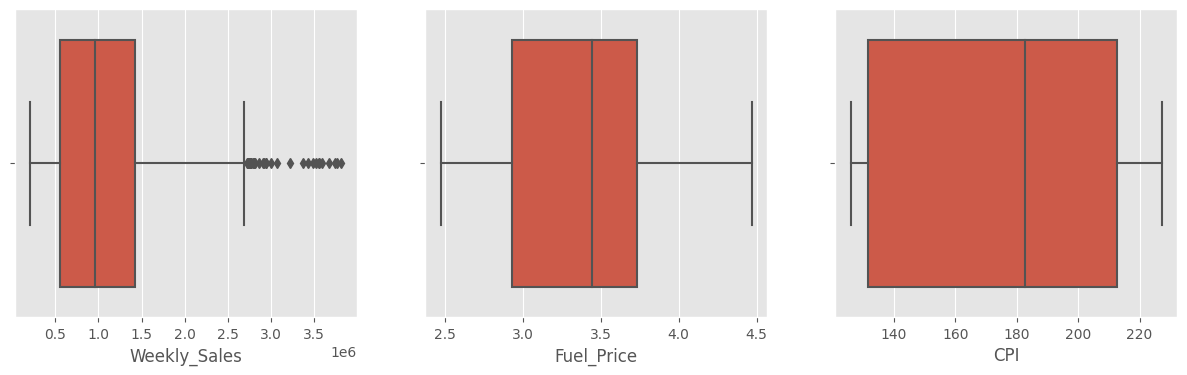

In [6]:
# Memeriksa outlier pada kolom Weekly_Sales, Fuel_Price, dan CPI
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
sns.boxplot(x=wal['Weekly_Sales'], ax=axs[0])
sns.boxplot(x=wal['Fuel_Price'], ax=axs[1])
sns.boxplot(x=wal['CPI'], ax=axs[2])

# Menampilkan boxplot
plt.show()

In [7]:
# Remove outliers pada data Weekly_Sales
Q1_sales = wal['Weekly_Sales'].quantile(0.25)
Q3_sales = wal['Weekly_Sales'].quantile(0.75)

IQR = Q3_sales - Q1_sales

batas_bawah = Q1_sales - 1.5 * IQR
batas_atas = Q3_sales + 1.5 * IQR

In [8]:
# Dataframe tanpa outliers
wal_new = wal[(wal['Weekly_Sales'] > batas_bawah) & (wal['Weekly_Sales'] < batas_atas)]
wal_new.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<Axes: xlabel='Weekly_Sales'>

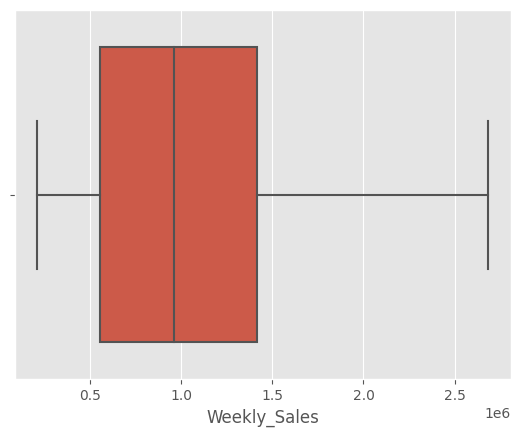

In [9]:
# Memastikan kembali tidak ada outlier pada dataframe
sns.boxplot(x = wal_new['Weekly_Sales'])

In [10]:
# Memeriksa inkonsistensi format pada dataframe
wal_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6401 non-null   int64  
 1   Date          6401 non-null   object 
 2   Weekly_Sales  6401 non-null   float64
 3   Holiday_Flag  6401 non-null   int64  
 4   Temperature   6401 non-null   float64
 5   Fuel_Price    6401 non-null   float64
 6   CPI           6401 non-null   float64
 7   Unemployment  6401 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 450.1+ KB


In [11]:
# Mengubah tipe data kolom tanggal menjadi tipe data Date (dd-mm-yyyy)
wal_new.loc[:, 'Date'] = pd.to_datetime(wal_new['Date'], format='%d-%m-%Y')

# Menampilkan tipe data kolom tanggal
wal_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6401 non-null   int64         
 1   Date          6401 non-null   datetime64[ns]
 2   Weekly_Sales  6401 non-null   float64       
 3   Holiday_Flag  6401 non-null   int64         
 4   Temperature   6401 non-null   float64       
 5   Fuel_Price    6401 non-null   float64       
 6   CPI           6401 non-null   float64       
 7   Unemployment  6401 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 450.1 KB


<ipython-input-11-661bcc22ecc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wal_new.loc[:, 'Date'] = pd.to_datetime(wal_new['Date'], format='%d-%m-%Y')
<ipython-input-11-661bcc22ecc4>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  wal_new.loc[:, 'Date'] = pd.to_datetime(wal_new['Date'], format='%d-%m-%Y')


### Statistika Deskriptif 45 toko

In [12]:
# Statistika deskriptif
wal_new.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6401.000000,6.401000e+03,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000
mean,23.054210,1.036130e+06,0.068895,60.772042,3.359634,171.642219,8.002298
std,12.991284,5.451961e+05,0.253296,18.417068,0.459696,39.359852,1.878705
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.517431e+05,0.000000,47.660000,2.933000,131.784000,6.891000
50%,23.000000,9.572983e+05,0.000000,62.860000,3.452000,182.658578,7.874000
75%,34.000000,1.414565e+06,0.000000,75.000000,3.737000,212.833640,8.622000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,14.313000


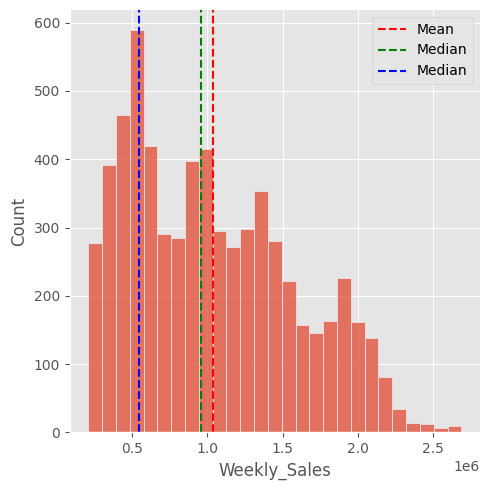

In [13]:
# Memeriksa distribusi data weekly sales
sns.displot(wal_new['Weekly_Sales'])

mean = np.mean(wal_new['Weekly_Sales'])
median = np.median(wal_new['Weekly_Sales'])
std = np.std(wal_new['Weekly_Sales'])

plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='--', label='Median')
plt.axvline(std, color='b', linestyle='--', label='Median')

plt.legend()

plt.show()

In [14]:
print(f"Mean = {mean}, Median = {median}, StDev = {std}")

Mean = 1036130.3535369473, Median = 957298.26, StDev = 545153.4674786476


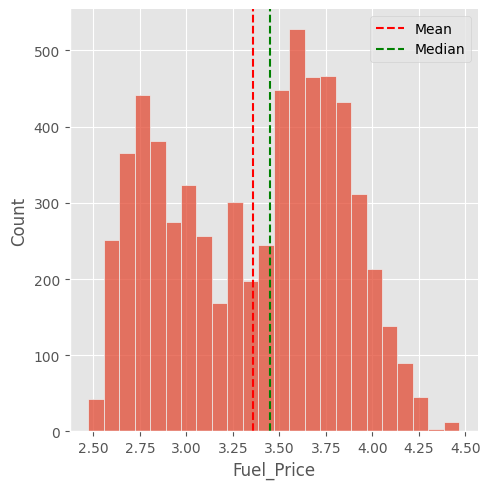

In [15]:
# Memeriksa distribusi data Fuel Price
sns.displot(wal_new['Fuel_Price'])

mean = np.mean(wal_new['Fuel_Price'])
median = np.median(wal_new['Fuel_Price'])

plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='--', label='Median')

plt.legend()

plt.show()

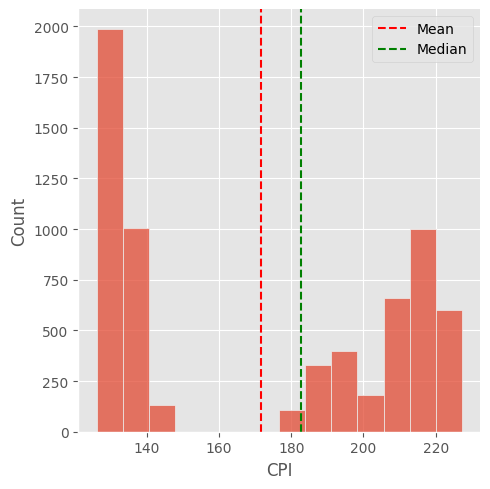

In [16]:
# Memeriksa distribusi data CPI
sns.displot(wal_new['CPI'])

mean = np.mean(wal_new['CPI'])
median = np.median(wal_new['CPI'])

plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='--', label='Median')

plt.legend()

plt.show()

## Analisis Peluang pada Variable Diskrit

### Peluang toko memiliki rata-rata weekly sales > rata-rata weekly sales nasional (45 toko)

In [17]:
mean_sales_toko = wal_new.groupby('Store')['Weekly_Sales'].mean()

In [18]:
# Rata-rata weekly sales seluruh toko
mean_sales_all = wal_new['Weekly_Sales'].mean()

# Rata-rata weekly sales setiap toko
mean_sales_toko = wal_new.groupby('Store')['Weekly_Sales'].mean()

# Subset DataFrame untuk toko-toko dengan rata-rata weekly sales lebih tinggi dari rata-rata weekly sales setiap toko
high_sales_toko = mean_sales_toko[mean_sales_toko > mean_sales_all]

# Peluang toko memiliki rata-rata weekly sales lebih tinggi dari rata-rata weekly sales setiap toko
peluang = len(high_sales_toko) / len(mean_sales_toko)
print("*Rata-rata weekly sales seluruh toko: ", mean_sales_all)
print("**Peluang toko memiliki rata-rata weekly sales lebih tinggi dari rata-rata weekly sales seluruh toko: ", peluang)

*Rata-rata weekly sales seluruh toko:  1036130.3535369473
**Peluang toko memiliki rata-rata weekly sales lebih tinggi dari rata-rata weekly sales seluruh toko:  0.4222222222222222


In [19]:
# Jumlah toko yang memiliki rata-rata weekly sales > rata-rata weekly sales nasional (45 toko)
jumlah_toko = len(high_sales_toko)
print(f"Jumlah toko yang memiliki rata-rata weekly sales > rata-rata weekly sales nasional adalah {jumlah_toko} toko")

Jumlah toko yang memiliki rata-rata weekly sales > rata-rata weekly sales nasional adalah 19 toko


### Analisis pada Toko-1

### Fokus analisis pada Toko-1

In [20]:
store_1 = wal_new[wal_new['Store'] == 1]

In [21]:
store_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 10.1 KB


In [22]:
# Memeriksa statistika deskriptif
store_1_stats = store_1.describe()

# Print statistika deskriptif Store 1
print("Descriptive Statistics for Store 1:")
print(store_1_stats)

Descriptive Statistics for Store 1:
       Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
count  143.0  1.430000e+02    143.000000   143.000000  143.000000  143.000000   
mean     1.0  1.555264e+06      0.069930    68.306783    3.219699  215.996892   
std      0.0  1.559808e+05      0.255926    14.250486    0.427313    4.350890   
min      1.0  1.316899e+06      0.000000    35.400000    2.514000  210.337426   
25%      1.0  1.458105e+06      0.000000    58.265000    2.764500  211.549277   
50%      1.0  1.534850e+06      0.000000    69.640000    3.290000  215.459905   
75%      1.0  1.614892e+06      0.000000    80.485000    3.594000  220.531330   
max      1.0  2.387950e+06      1.000000    91.650000    3.907000  223.444251   

       Unemployment  
count    143.000000  
mean       7.610420  
std        0.383749  
min        6.573000  
25%        7.348000  
50%        7.787000  
75%        7.838000  
max        8.106000  


<Axes: xlabel='Weekly_Sales'>

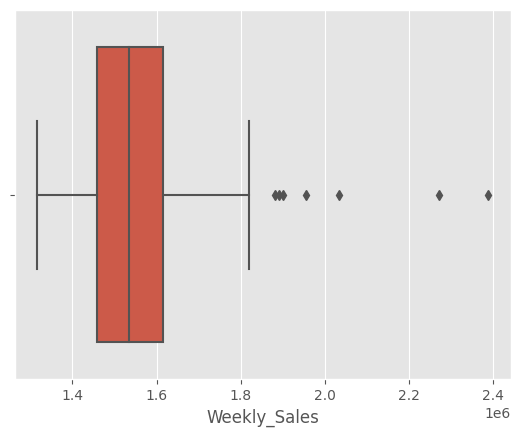

In [23]:
# Memeriksa outlier pada kolom Weekly_Sales
sns.boxplot(x=store_1['Weekly_Sales'])

In [24]:
# Remove outliers
# Terdapat outlier pada data Weekly_Sales
Q1_sales = store_1['Weekly_Sales'].quantile(0.25)
Q3_sales = store_1['Weekly_Sales'].quantile(0.75)

IQR = Q3_sales - Q1_sales

batas_bawah = Q1_sales - 1.5 * IQR
batas_atas = Q3_sales + 1.5 * IQR

In [25]:
# Dataframe tanpa outliers
store_1_new = store_1[(store_1['Weekly_Sales'] > batas_bawah) & (store_1['Weekly_Sales'] < batas_atas)]
store_1_new.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


<Axes: xlabel='Weekly_Sales'>

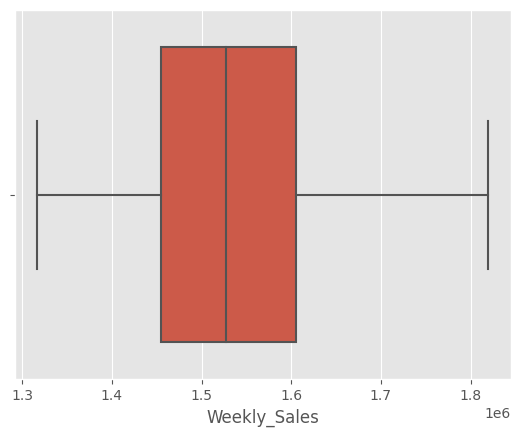

In [26]:
# Memastikan kembali tidak ada outlier pada data Store_1
sns.boxplot(x=store_1_new['Weekly_Sales'])

In [27]:
# Total baris data tanpa outliers
len(store_1_new)

136

In [28]:
store_1_correlation = round(store_1_new[store_1_new.columns[2:8]].corr(),3)
store_1_correlation

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000,0.130,-0.121,0.274,0.366,-0.267
Holiday_Flag,0.130,1.000,-0.213,-0.066,-0.020,0.059
Temperature,-0.121,-0.213,1.000,0.216,0.119,-0.159
Fuel_Price,0.274,-0.066,0.216,1.000,0.754,-0.503
CPI,0.366,-0.020,0.119,0.754,1.000,-0.829
Unemployment,-0.267,0.059,-0.159,-0.503,-0.829,1.000


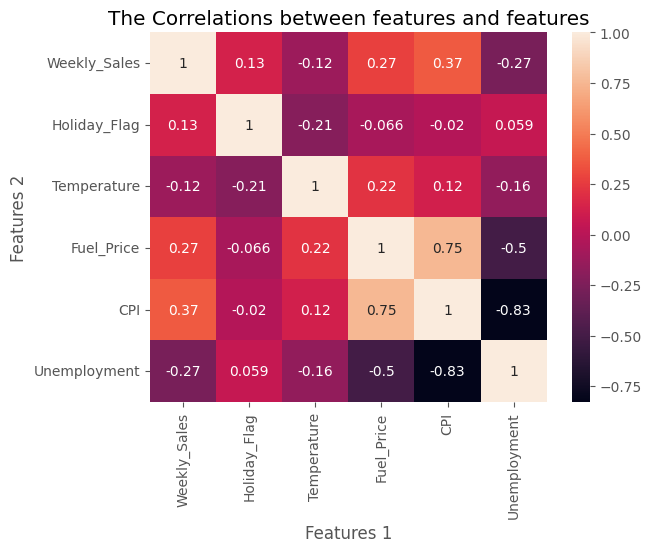

In [29]:
sns.heatmap(store_1_correlation,annot=True)
plt.title('The Correlations between features and features')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.show()

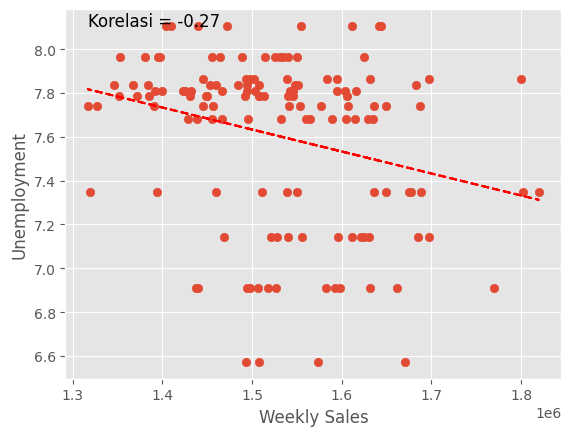

In [30]:
# Mengambil data weekly sales dan unemployment
weekly_sales = store_1_new['Weekly_Sales']
unemployment = store_1_new['Unemployment']

# Menghitung nilai korelasi
corr = np.corrcoef(weekly_sales, unemployment)[0, 1]

# Membuat scatter plot
plt.scatter(weekly_sales, unemployment)

# Menambahkan trendline
z = np.polyfit(weekly_sales, unemployment, 1)
p = np.poly1d(z)
plt.plot(weekly_sales, p(weekly_sales), "r--")

# Menampilkan nilai korelasi
plt.text(min(weekly_sales), max(unemployment), "Korelasi = {:.2f}".format(corr), fontsize=12)

# Menambahkan label pada sumbu x dan y
plt.xlabel("Weekly Sales")
plt.ylabel("Unemployment")

# Menampilkan plot
plt.show()

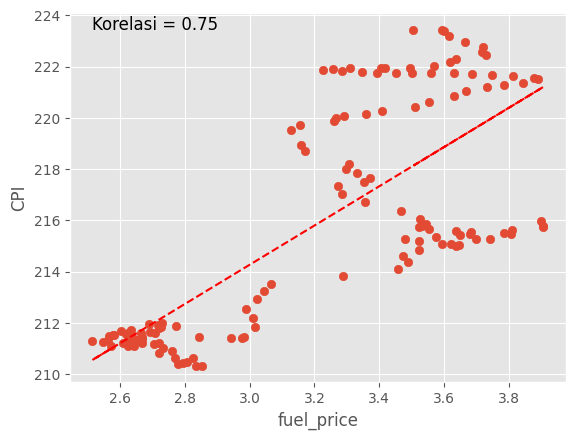

In [31]:
# Mengambil data fuel price dan CPI
fuel_price = store_1_new['Fuel_Price']
CPI = store_1_new['CPI']

# Menghitung nilai korelasi
corr = np.corrcoef(fuel_price, CPI)[0, 1]

# Membuat scatter plot
plt.scatter(fuel_price, CPI)

# Menambahkan trendline
z = np.polyfit(fuel_price, CPI, 1)
p = np.poly1d(z)
plt.plot(fuel_price, p(fuel_price), "r--")

# Menampilkan nilai korelasi
plt.text(min(fuel_price), max(CPI), "Korelasi = {:.2f}".format(corr), fontsize=12)

# Menambahkan label pada sumbu x dan y
plt.xlabel("fuel_price")
plt.ylabel("CPI")

# Menampilkan plot
plt.show()

### Peluang week dengan public holiday memiliki sales > rata-rata weekly sales tokonya

In [32]:
# Cari rata-rata sales toko 1
mean_sales_toko1 = store_1_new['Weekly_Sales'].mean()

# Subset dataframe untuk week dengan public holiday
public_holiday_sales = store_1_new[store_1_new['Holiday_Flag'] == 1]['Weekly_Sales']

# Cari peluang week dengan public holiday memiliki sales lebih dari rata-rata weekly sales toko 1
peluang = len(public_holiday_sales[public_holiday_sales > mean_sales_toko1]) / len(public_holiday_sales)
print(f"Peluang week dengan public holiday memiliki sales lebih dari rata-rata weekly sales toko 1 adalah {peluang}")

Peluang week dengan public holiday memiliki sales lebih dari rata-rata weekly sales toko 1 adalah 0.625


In [33]:
# Rata-rata weekly sales toko 1
print(f"Rata-rata weekly sales toko 1 adalah {mean_sales_toko1}")

Rata-rata weekly sales toko 1 adalah 1530028.208897059


In [34]:
# Jumlah week toko 1 dengan public holiday
print(f"Jumlah week toko 1 dengan public holiday adalah {len(public_holiday_sales)}")

Jumlah week toko 1 dengan public holiday adalah 8


In [35]:
# Jumlah week toko 1 dengan public holiday & weekly sales lebih dari rata-rata sales
print(f"Jumlah week toko 1 dengan public holiday & weekly sales lebih dari rata-rata sales {len(public_holiday_sales[public_holiday_sales > mean_sales_toko1])}")

Jumlah week toko 1 dengan public holiday & weekly sales lebih dari rata-rata sales 5


## Analisis Peluang pada Variable Kontinu

### Wekly Sales

Text(0, 0.5, 'Count')

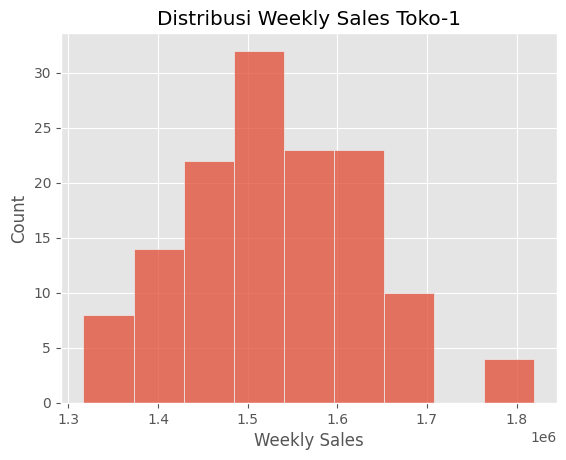

In [36]:
# Histogram weekly sales Toko 1
sns.histplot(data=store_1_new, x="Weekly_Sales")
plt.title('Distribusi Weekly Sales Toko-1')
plt.xlabel('Weekly Sales')
plt.ylabel('Count')

In [37]:
# Statistika Deskriptif
store_1_new["Weekly_Sales"].describe()

count    1.360000e+02
mean     1.530028e+06
std      1.031847e+05
min      1.316899e+06
25%      1.455113e+06
50%      1.527430e+06
75%      1.604955e+06
max      1.819870e+06
Name: Weekly_Sales, dtype: float64

Berdasarkan distribusinya, Weekly Sales Toko-1 diketahui mendekati normal dengan $\mu = 1530028$ dan $\sigma = 103185.$

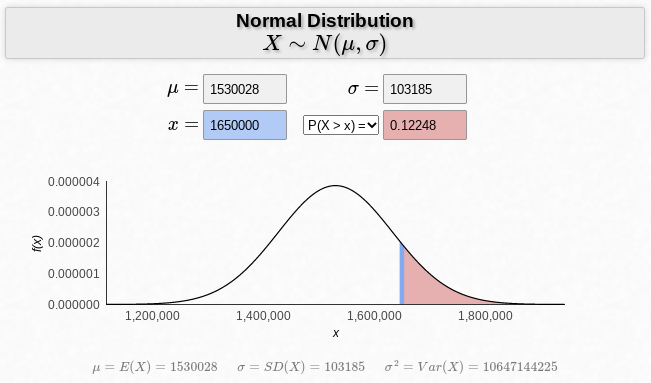

[Source](https://homepage.divms.uiowa.edu/~mbognar/applets/normal.html)

Jika Weekly Sales Toko-1 > 1650000 termasuk EXCELLENT, dan < 1450000 termasuk BAD. Mana yang lebih mungkin terjadi, Excellent Weekly Sales atau Bad Weekly Sales?

In [38]:
# Berapa peluang Toko-1 memiliki perolehan Excellent Weekly Sales?
excellent_sales = (1-norm.cdf(x=1650000, loc=1530028, scale=103185)) * 100 # karena lebih dari 1750000 maka 1-norm
print(f'Peluang Toko-1 memiliki Excellent Weekly Sales adalah {excellent_sales:.2f}%')

Peluang Toko-1 memiliki Excellent Weekly Sales adalah 12.25%


In [39]:
# Berapa peluang Toko-1 memiliki perolehan Bad Weekly Sales?
bad_sales = (norm.cdf(x=1450000, loc=1530028, scale=103185)) * 100
print(f'Peluang Toko-1 memiliki Bad Weekly Sales adalah {bad_sales:.2f}%')

Peluang Toko-1 memiliki Bad Weekly Sales adalah 21.90%


**Jadi peluang Toko-1 memiliki peluang BAD weekly sales lebih besar dari peluang EXCELLENT weekly sales.**

### Weekly CPI

Text(0, 0.5, 'Count')

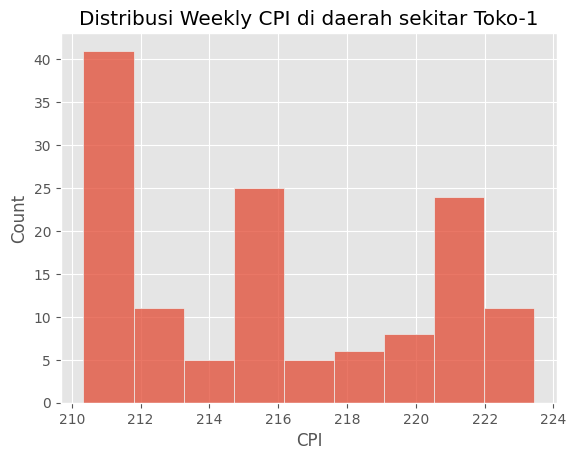

In [40]:
# Histogram CPI di daerah Toko 1
sns.histplot(data=store_1_new, x="CPI")
plt.title('Distribusi Weekly CPI di daerah sekitar Toko-1')
plt.xlabel('CPI')
plt.ylabel('Count')

In [41]:
# Statistika Deskriptif
store_1_new["CPI"].describe()

count    136.000000
mean     215.989384
std        4.363793
min      210.337426
25%      211.558291
50%      215.441092
75%      220.689688
max      223.444251
Name: CPI, dtype: float64

Berdasarkan distribusinya, CPI di daerah Toko-1 diketahui mendekati eksponensial dengan $\mu = 215.98$

Mana yang lebih mungkin terjadi, peluang CPI di daerah Toko-1 memiliki nilai kurang dari $\mu$ atau lebih dari $\mu$?

In [42]:
mean = 215.98  # rata-rata distribusi CPI
lambd = 1/mean
var = 1/(lambd**2)
var

46647.3604

In [43]:
lambd

0.004630058338735068

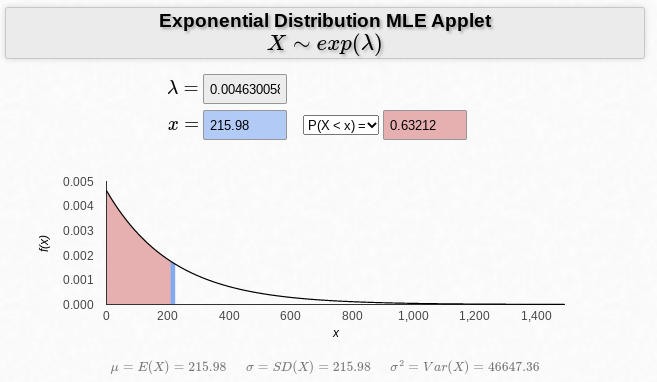

In [44]:
mean = 215.98  # rata-rata distribusi CPI
x = mean  # nilai x yang akan dihitung peluangnya

# Peluang CPI di daerah Toko-1 memiliki nilai kurang dari rata-rata (μ)
below_mean = expon.cdf(x=x, scale=mean)
print(f'Peluang CPI di daerah Toko-1 memiliki nilai kurang dari rata-rata (μ) adalah {below_mean:.2%}')

Peluang CPI di daerah Toko-1 memiliki nilai kurang dari rata-rata (μ) adalah 63.21%


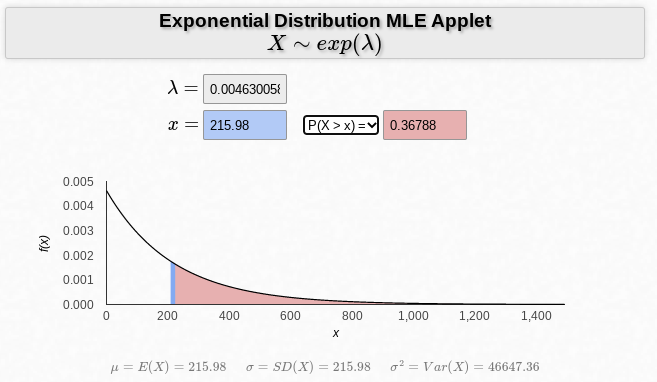

In [45]:
# Peluang CPI di daerah Toko-1 memiliki nilai lebih dari rata-rata (μ)
above_mean = 1 - expon.cdf(x=x, scale=mean)
print(f'Peluang CPI di daerah Toko-1 memiliki nilai lebih dari rata-rata (μ) adalah {above_mean:.2%}')

Peluang CPI di daerah Toko-1 memiliki nilai lebih dari rata-rata (μ) adalah 36.79%


[Source](https://homepage.divms.uiowa.edu/~mbognar/applets/exp-like.html)

Diketahui peluang CPI di daerah Toko-1 kurang dari rataannya adalah 63.21% dan peluang CPI di daerah Toko-1 lebih dari rataannya adalah 36.78%. Jadi peluang CPI di daerah Toko-1 lebih mungkin terjadi ketika nilai CPI kurang dari rataannya. Ini adalah hal yang baik, karena semakin rendah nilai CPI maka daya beli masyarakat semakin tinggi.

## Bayes Rule


$$
P(\text{A|B}) = \cfrac{P(\text{A}) P(\text{B} \ | \ \text{A})}{P(\text{B})}
$$


Misal:

    - A = {weekly sales lebih tinggi dari rata-rata}
    - B = {CPI lebih rendah dari rata-rata}


    Maka yang akan dicari adalah:

$$
P(\text{high_sales|low_cpi}) = \cfrac{P(\text{high_sales}) P(\text{low_cpi} \ | \ \text{high_sales})}{P(\text{low_cpi})}
$$

Dimana:

     P(high_sales) = prior
     P(low_cpi|high_sales) = likelihood
     P(low_cpi) = evidence = marginal likelihood
     P(high_sales|low_cpi) = posterior




### Peluang Toko-1 memiliki Weekly Sales lebih dari rata-rata Weekly Sales ketika diketahui CPI lebih rendah dari rata-rata CPI.

In [46]:
# Mencari rata-rata CPI dan Weekly Sales
sales_mean = store_1_new['Weekly_Sales'].mean()
cpi_mean = store_1_new['CPI'].mean()

# Filter toko-toko dengan CPI dibawah rata-rata
low_cpi_stores = store_1_new[store_1_new['CPI'] < cpi_mean]

# Menghitung prior probability
prior_prob = len(store_1_new[store_1_new['Weekly_Sales'] > sales_mean]) / len(store_1_new)

# Menghitung likelihood
likelihood = len(low_cpi_stores[low_cpi_stores['Weekly_Sales'] > sales_mean]) / len(low_cpi_stores)

# Menghitung evidence
evidence = len(store_1_new[store_1_new['CPI'] < cpi_mean]) / len(store_1_new)

# Menghitung posterior probability menggunakan Teorema Bayes
posterior_prob = (likelihood * prior_prob) / evidence

print("Prior probability: ", prior_prob)
print("Likelihood: ", likelihood)
print("Evidence: ", evidence)
print("Peluang Toko Memiliki Weekly Sales Lebih dari Rata-rata Weekly Sales Ketika CPI Lebih Rendah dari Rata-rata CPI:", posterior_prob)

Prior probability:  0.49264705882352944
Likelihood:  0.43209876543209874
Evidence:  0.5955882352941176
Peluang Toko Memiliki Weekly Sales Lebih dari Rata-rata Weekly Sales Ketika CPI Lebih Rendah dari Rata-rata CPI: 0.35741502819692117


In [47]:
print(f"*Rata-rata sales Toko 1 adalah {sales_mean}")
print(f"**Rata-rata CPI adalah {cpi_mean}")

*Rata-rata sales Toko 1 adalah 1530028.208897059
**Rata-rata CPI adalah 215.98938417279413


### Peluang Toko memiliki Weekly Sales lebih dari rata-rata Weekly Sales ketika Fuel Price lebih rendah dari rata-rata Fuel Price.

In [48]:
# Mencari rata-rata Fuel Price dan Weekly Sales
sales_mean = store_1_new['Weekly_Sales'].mean()
fuel_mean = store_1_new['Fuel_Price'].mean()

# Filter toko-toko dengan Fuel_Price dibawah rata-rata
low_fuel_stores = store_1_new[store_1_new['Fuel_Price'] < fuel_mean]

# Menghitung prior probability dari toko memiliki weekly sales > rata-rata weekly sales
prior_prob = len(store_1_new[store_1_new['Weekly_Sales'] > sales_mean]) / len(store_1_new)

# Menghitung likelihood dari toko memiliki weekly sales di atas rata-rata weekly sales yang diberikan Fuel_Price lebih rendah dari rata-rata Fuel_Price.
likelihood = len(low_fuel_stores[low_fuel_stores['Weekly_Sales'] > sales_mean]) / len(low_fuel_stores)

# Menghitung evidence dari toko memiliki weekly sales di atas rata-rata weekly sales yang diberikan Fuel Price lebih rendah dari rata-rata Fuel Price
evidence = len(store_1_new[store_1_new['Fuel_Price'] < cpi_mean]) / len(store_1_new)

# Menghitung posterior probability menggunakan Teorema Bayes
posterior_prob = (likelihood * prior_prob) / evidence

print("Peluang Toko Memiliki Weekly Sales Lebih dari Rata-rata Weekly Sales Ketika Fuel Price Lebih Rendah dari Rata-rata Fuel Price:", posterior_prob)

Peluang Toko Memiliki Weekly Sales Lebih dari Rata-rata Weekly Sales Ketika Fuel Price Lebih Rendah dari Rata-rata Fuel Price: 0.18150154798761609


In [49]:
print(f"*Rata-rata sales Toko 1 adalah {sales_mean}")
print(f"**Rata-rata fuel price adalah {fuel_mean}")

*Rata-rata sales Toko 1 adalah 1530028.208897059
**Rata-rata fuel price adalah 3.2244779411764704


## Pengujian Hipotesis

### Hypothesis Testing Mean pada Toko-1

Apakah rata-rata (miu) penjualan mingguan (weekly sales) kurang dari 1,500,000 (1500000).

In [50]:
w_sales_1 = store_1_new['Weekly_Sales']
a = np.mean(w_sales_1)
b = np.var(w_sales_1)
print(a, b)

1530028.208897059 10568802882.567709


In [51]:
# H0: miu >= 1500000
# H1: miu <  1500000 # yang ditanyakan

w_sales_1 = store_1_new['Weekly_Sales']
alpha = 0.05
mu0 = 1500000

# rata rata sample
xbar = np.mean(w_sales_1)
std = np.std(w_sales_1)
n_sample = len(w_sales_1)

# hitung t-statistic secara manual
t_hitung = (xbar-mu0)/(std/np.sqrt(n_sample)) # varians populasi tidak diketahui

# hasil t_hitung perhitungan manual
print(f't_hitung: {round(t_hitung,3)}')

# Nilai Critical Value berdasarkan critical t dari t-table dengan nilai alpha 0.05 dan degree of freedom (df = n-1)
t_crit = t.ppf(alpha,df=n_sample-1)
print('t_table:', t_crit)

pvalue_manual = t.cdf(t_hitung, n_sample-1)
print('p_value: ',pvalue_manual)

t_hitung: 3.406
t_table: -1.6562191327514424
p_value:  0.9995661196004019


In [52]:
print('Pengambilan Keputusan')

# jika p-value besar dari alpha maka:
if pvalue_manual > alpha:
  print('Gagal tolak H0')
# jika p-value tidak lebih besar dari alpha maka:
else:
  print('Tolak H0')

Pengambilan Keputusan
Gagal tolak H0


Berdasarkan hasil perhitungan, nilai t_hitung sebesar 3.406 dan nilai t_table sebesar -1.656. Karena nilai t_hitung lebih besar dari nilai t_table dan p-value sebesar 0.999 lebih besar dari alpha (0.05), maka gagal tolak H0.



Dalam konteks ini, H0 adalah bahwa rata-rata weekly sales)sama dengan atau lebih dari 1.500.000. Hipotesis alternatif (H1) adalah bahwa rata-rata penjualan mingguan kurang dari 1500000. Karena gagal menolak H0, maka tidak memiliki cukup bukti untuk menyatakan bahwa rata-rata penjualan mingguan kurang dari 1500000.

In [53]:
# H0: miu <= 1500000
# H1: miu >  1500000 # yang ditanyakan

w_sales_1 = store_1_new['Weekly_Sales']

alpha = 0.05
mu0 = 1500000

# rata rata sample
xbar = np.mean(w_sales_1)
std = np.std(w_sales_1)
n_sample = len(w_sales_1)

# hitung t-statistic secara manual
t_hitung = (xbar-mu0)/(std/np.sqrt(n_sample))

# hasil t_hitung perhitungan manual
print(f't_hitung: {round(t_hitung,3)}')

# Nilai Critical Value berdasarkan critical t dari t-table dengan nilai alpha 0.005 dan degree of freedom (df = n-1)
t_crit = t.ppf(1-alpha,df=n_sample-1)
print('t_table:', t_crit)

pvalue_manual = t.cdf(t_hitung, n_sample-1)
print('p_value: ',1-pvalue_manual) # lebih dari, dihitung dari kiri, sehingga 1 -

t_hitung: 3.406
t_table: 1.6562191327514415
p_value:  0.00043388039959812996


Berdasarkan hasil perhitungan, nilai p-value sebesar 0.00043388039959812996 lebih kecil dari alpha (0.05), dan nilai t_hitung sebesar 3.406 lebih besar dari nilai t_table sebesar 1.656. Oleh karena itu, kita dapat menolak hipotesis nol (H0) dan menyimpulkan bahwa rata-rata penjualan mingguan (weekly sales) di toko tersebut lebih besar dari 1500000.

Dalam konteks ini, hipotesis nol (H0) adalah bahwa rata-rata penjualan mingguan sama dengan atau kurang dari 1500000. Hipotesis alternatif (H1) adalah bahwa rata-rata penjualan mingguan lebih dari 1500000. Karena kita menolak H0, maka kita memiliki cukup bukti untuk menyatakan bahwa penjualan mingguan di toko tersebut lebih dari 1500000.



---



Menghitung statistik uji dan nilai p-value menggunakan library scipy

In [54]:
stat, pvalue = ttest_1samp(a=w_sales_1, popmean=mu0, alternative='less')
print(stat, pvalue)

3.3937778722853937 0.9995474030910875


Berdasarkan hasil perhitungan, nilai p-value sebesar 0.999 kurang dari alpha (0.05), dan nilai t_hitung sebesar 3.394 lebih dari nilai t_table sebesar 1.656. Oleh karena itu, gagal tolak H0 dan cukup bukti bahwa rata-rata weekly sales di Toko 1 lebih dari sama dengan 1.500.000.



---



### Hypothesis Testing Proportion

Dua populasi

Seorang pengamat retail menyatakan bahwa weekly sales toko 7 lebih sering diatas rata-rata nasional daripada weekly sales toko 8. Apakah benar?

In [55]:
# H0: Weekly sales toko 7 tidak lebih sering di atas rata-rata nasional daripada weekly sales toko 8.
# H1: Weekly sales toko 7 lebih sering di atas rata-rata nasional daripada weekly sales toko 8.

# cari rata-rata weekly sales nasional
mean_nat_sales = wal_new['Weekly_Sales'].mean()
print(mean_nat_sales)

# cari rata-rata weekly sales toko-1, hitung berapa yang diatas rata-rata nasional?
store_1_sales = wal_new[wal_new['Store'] == 1]['Weekly_Sales']
count_sales1 = len(store_1_sales[store_1_sales > mean_nat_sales])

print(f"Jumlah weekly sales dari Store = 1 yang lebih besar dari mean_nat_sales: {count_sales1}")

# cari rata-rata weekly sales toko-2, hitung berapa yang diatas rata-rata nasional?
store_2_sales = wal_new[wal_new['Store'] == 2]['Weekly_Sales']
count_sales2 = len(store_2_sales[store_2_sales > mean_nat_sales])

print(f"Jumlah weekly sales dari Store = 2 yang lebih besar dari mean_nat_sales: {count_sales2}")

1036130.3535369473
Jumlah weekly sales dari Store = 1 yang lebih besar dari mean_nat_sales: 143
Jumlah weekly sales dari Store = 2 yang lebih besar dari mean_nat_sales: 141


In [56]:
# cari rata-rata weekly sales nasional
mean_nat_sales = wal_new['Weekly_Sales'].mean()
print(mean_nat_sales)

# cari rata-rata weekly sales toko 7, count lebih dari rata-rata nasional?
store_7_sales = wal_new[wal_new['Store'] == 7]['Weekly_Sales']
count_sales7 = len(store_7_sales[store_7_sales > mean_nat_sales])

# cari rata-rata weekly sales toko 8, count lebih dari rata-rata nasional?
store_8_sales = wal_new[wal_new['Store'] == 8]['Weekly_Sales']
count_sales8 = len(store_8_sales[store_8_sales > mean_nat_sales])

1036130.3535369473


In [57]:
# H0: Weekly sales toko 7 tidak lebih sering di atas rata-rata nasional daripada weekly sales toko 8.
# H1: Weekly sales toko 7 lebih sering di atas rata-rata nasional daripada weekly sales toko 8.

# Count weekly sales toko 7 dan 8 lebih dari weekly sales national:
print(f"Jumlah weekly sales dari Store 7 yang lebih besar dari mean_nat_sales: {count_sales7}")
print(f"Jumlah weekly sales dari Store 8 yang lebih besar dari mean_nat_sales: {count_sales8}")

Jumlah weekly sales dari Store 7 yang lebih besar dari mean_nat_sales: 2
Jumlah weekly sales dari Store 8 yang lebih besar dari mean_nat_sales: 11


In [58]:
# Count sample sizes:
print('Count weekly sales dari Toko 7 adalah', len(store_7_sales))
print('Count weekly sales dari Toko 8 adalah', len(store_8_sales))

Count weekly sales dari Toko 7 adalah 143
Count weekly sales dari Toko 8 adalah 143


In [59]:
great_weekly_sales = np.array([  2,  11])
total_sample_sizes = np.array([143, 143])

In [60]:
stat, pvalue = proportions_ztest(great_weekly_sales, total_sample_sizes, alternative='larger')
print(stat, pvalue)

-2.554891881757921 0.9946889606995236


Tidak ada cukup bukti statistik untuk menolak H0. Ini berarti bahwa tidak ada cukup bukti untuk menyimpulkan bahwa weekly sales toko 7 lebih sering di atas rata-rata nasional daripada weekly sales toko 8 secara signifikan.

Gagal menolak hipotesis nol (H0) dan menyimpulkan bahwa tidak ada cukup bukti untuk menyatakan bahwa weekly sales toko 7 lebih sering di atas rata-rata nasional daripada weekly sales toko 8



---



### Hypothesis Testing Variance

Apakah varians weekly sales Toko 7 berbeda dari varians weekly sales Toko 8?

In [61]:
# H0: Varians weekly sales toko 7 sama dengan varians weekly sales toko 8.
# H1: Varians weekly sales toko 7 berbeda dari varians weekly sales toko 8.
alpha = 0.05

# Hitung varians weekly sales toko 7 dan 8
variance_7 = np.var(store_7_sales, ddof=1)  # ddof=1 untuk menghitung varians sample
variance_8 = np.var(store_8_sales, ddof=1)

# Hitung nilai F-statistic
f_statistic = variance_7 / variance_8

# Hitung nilai p-value menggunakan distribusi F
df1 = len(store_7_sales) - 1  # derajat kebebasan untuk toko 7
df2 = len(store_8_sales) - 1  # derajat kebebasan untuk toko 8
p_value = 2 * (1 - f.cdf(f_statistic, df1, df2))  # dikalikan 2 karena two-tailed test

# Cetak hasil
print("Varians weekly sales Toko 7:", variance_7)
print("Varians weekly sales Toko 8:", variance_8)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Varians weekly sales Toko 7: 12675487879.439724
Varians weekly sales Toko 8: 11295614800.17563
F-statistic: 1.1221600686350104
p-value: 0.49314422376422984


In [62]:
# Tolak H0 jika p-value kurang dari alpha
if p_value < alpha:
    print("Tolak H0")
else:
    print("Gagal tolak H0")

Gagal tolak H0


Gagal menolak H0, tidak ada bukti yang cukup untuk menyimpulkan perbedaan yang signifikan dalam varians weekly sales antara Toko 7 dan Toko 8.



---

